# SIMILAR PLAYERS

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load data from Excel file
df = pd.read_excel(r'/Users/marclambertes/Downloads/Scouting men 2324.xlsx', index_col='Player')
df = df[df['Minutes played'] >= 500]

#df = df[df['League'] == 'Eredivisie']
#df = df[(df['League'] != 'Belarus') & (df['League'] != 'Russian Super League') & (df['League'] != 'Ukraine')]
#df = df[(df['Team'] != 'Chelsea')]


cols_to_drop = ['Minutes played', 'Matches played', 'Birth country',
                'Passport country', 'Height', 'Weight',]
df = df.drop(columns=cols_to_drop)

# Check for missing values and fill with 0
if df.isna().values.any():
    df = df.fillna(0)

# Select 'Team', 'Team within selected timeframe', 'League', 'Position' columns and numeric columns
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
df = df[['Team', 'Team within selected timeframe', 'League', 'Position'] + num_cols]

# Calculate z-scores
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Calculate cosine similarity
cosine_sim = cosine_similarity(df[num_cols])

# Function to get most similar players
def get_similar_players(player_name, top_n=300):
    index = df.index.get_loc(player_name)
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_scores = sim_scores[1:top_n + 1]
    similar_players = [(df.index[i], df.iloc[i]['Team within selected timeframe'], df.iloc[i]['League'],
                        df.iloc[i]['Position'], score) for i, score in top_scores]
    return similar_players

# Input player name
player_name = input("Enter a player name: ")
similar_players = get_similar_players(player_name)

# Normalize similarity scores to 0-100%
max_similarity = max(similar_players, key=lambda x: x[4])[4]
similar_players = [(player, team, league, position, score / max_similarity * 100) for player, team, league, position, score in similar_players]

# Print similar players
print(f"Players similar to {player_name}:")
for player, team, league, position, score in similar_players:
    print(f"Player: {player}\nTeam: {team}\nLeague: {league}\nPosition: {position}\nSimilarity Score: {score}%\n")

# Write similar players to Excel file
output_filename = r'/Users/marclambertes/Python/similar players A. Král.xlsx'
similar_players_df = pd.DataFrame(similar_players, columns=['Player', 'Team', 'League', 'Position', 'Similarity Score'])
similar_players_df.to_excel(output_filename, index=False)
print(f"Similar players saved to {output_filename}")


Enter a player name: D. Taylor-
Players similar to D. Taylor-:
Player: S. Murray
Team: Ross County
League: Scottish Premiership
Position: CF, LWF
Similarity Score: 100.0%

Player: K. Boateng
Team: First Vienna
League: Austrian 2. Bundesliga
Position: RAMF, CF, RWF
Similarity Score: 98.84494102958953%

Player: M. Prunier
Team: Versailles
League: Championnat National
Position: CF
Similarity Score: 98.36054595535661%

Player: O. Diakité
Team: Reims
League: Ligue 1
Position: CF
Similarity Score: 97.82271304087469%

Player: M. Inchaud
Team: Niort
League: Championnat National
Position: CF, RAMF
Similarity Score: 97.46261925512854%

Player: E. Simms
Team: Coventry City
League: Championship
Position: CF
Similarity Score: 97.20908554278766%

Player: H. Hannouri
Team: FUS Rabat
League: Morocco
Position: CF
Similarity Score: 95.80741349195951%

Player: D. Popa
Team: Universitatea Cluj
League: Romania Super League
Position: CF
Similarity Score: 95.33291568156788%

Player: K. Doumtsios
Team: TOP Os

Similar players saved to /Users/marclambertes/Python/similar players A. Král.xlsx


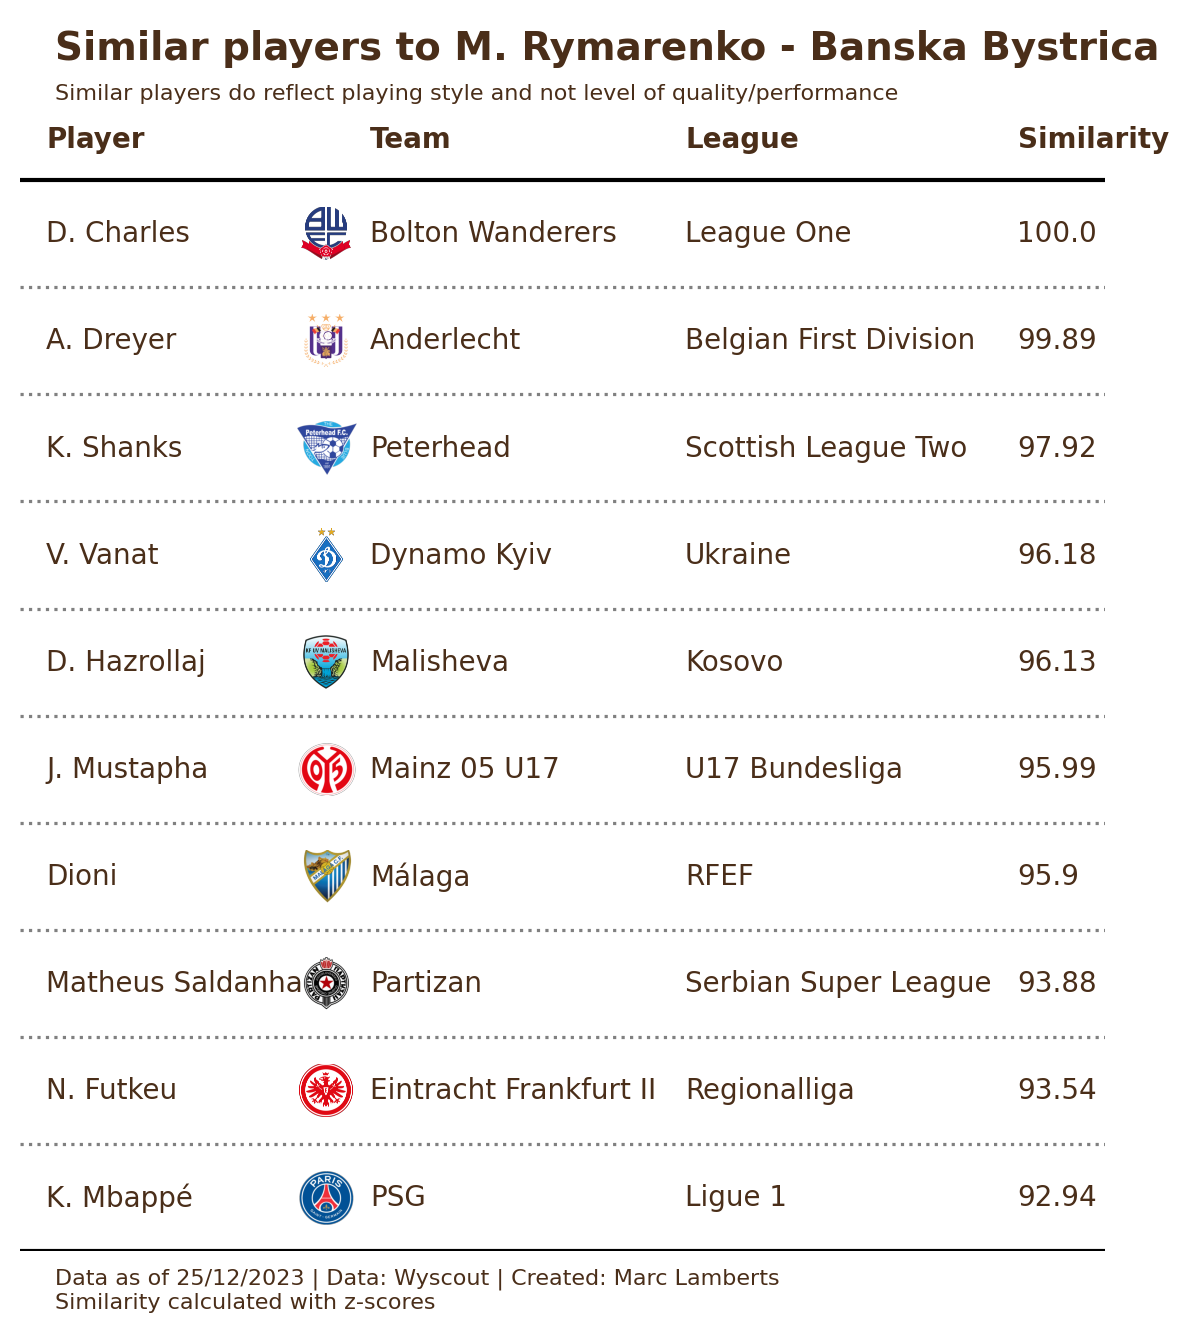

In [39]:
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter


df = pd.read_excel('/Users/marclambertes/Python/similar players S. Lennartsson.xlsx')
df['League'] = df['League'].str.split(' - ').str[0]

df = df[(df['League'] != 'Armenia')]
#df = df[df['Age'] <= 23]

df = df.rename(columns={'Similarity Score': 'Similarity'})
def ax_logo(team, ax,):
    path = r'/Users/marclambertes/Downloads/Images'
    club_icon = Image.open('%s/%s.png' %(path,team))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax
df['Similarity'] = (df['Similarity']).round(2)



indexdf = df.head(10)[['Player', 'Team', 'League', 'Similarity']].reset_index(drop=True)
indexdf_short=indexdf[::-1]

fig = plt.figure(figsize=(7,8), dpi=200)
ax = plt.subplot()

ncols = len(indexdf_short.columns.tolist())+1
nrows = indexdf_short.shape[0]

ax.set_xlim(0, ncols + 1.2)
ax.set_ylim(0, nrows + 1.5)

# lgs = ['J1', 'J2', 'Ekstraklasa', 'J3']
# if lg in lgs:
positions = [0.15, 2.0, 3.8, 5.7]
# else:
#     positions = [0.25, 2.25, 3.75, 4.5, 5.25]
columns = indexdf_short.columns.tolist()

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if 'xG per 90' in column:
            text_label = f'{indexdf_short[column].iloc[i]:,.2f}'
            weight = 'regular'
        else:
            text_label = f'{indexdf_short[column].iloc[i]}'
            weight = 'regular'
        ax.annotate(
            xy=(positions[j], i + .5),
            text = text_label,
            ha='left',
            va='center', color='#4A2E19',
            weight=weight
        )

# Add column names
column_names = columns
for index, c in enumerate(column_names):
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha='left',
            va='bottom',
            weight='bold', color='#4A2E19'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.set_axis_off()

DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([1.5, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(indexdf_short['Team'].iloc[x], flag_ax,)

fig.text(
    x=0.15, y=.85,
    s='Similar players to M. Rymarenko - Banska Bystrica',
    ha='left',
    va='bottom',
    weight='bold',
    size=14, color='#4A2E19'
)
fig.text(
    x=0.15, y=0.10,
    s='Data as of 25/12/2023 | Data: Wyscout | Created: Marc Lamberts\nSimilarity calculated with z-scores',
    ha='left',
    va='top',
    weight='regular',
    size=8, color='#4A2E19'
)

fig.text(
    x=0.15, y=0.84,
    s='Similar players do reflect playing style and not level of quality/performance',
    ha='left',
    va='top',
    weight='regular',
    size=8, color='#4A2E19'
)

plt.savefig('Similar Players - Rymarenko.png',dpi=750,bbox_inches = 'tight', facecolor='white')
#plt.savefig('Similar Players - Momiki.pdf', dpi=750, bbox_inches='tight', facecolor='white')
